In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
#reading the dataset into code and displaying first 5 rows
path='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(path)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value.


In [ ]:
#describing the datset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#obtaining information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


All columns are in desired datatype. So we can proceed with analysis.


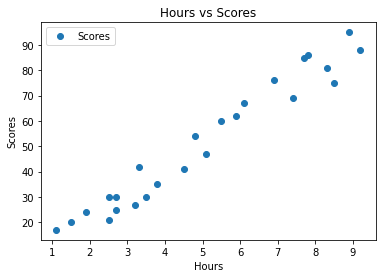

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
#plotting relation between hours and scores 
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

#calculating th correlation between hours and scores 
print(df.corr())
 

There seems to be a high positive correlation (0.97) between scores and hours studied.

In [ ]:
#training and testing data

#splitting data into training data and testing data. We will place target data in separate dataframe y
y_data=df['Scores']

#drop price data in x data
x_data=df.drop('Scores', axis=1)

#split data into training and testing data using the funtion train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)  #testing set is 10% of total dataset



In [ ]:
#create linear regression object
lre=LinearRegression()

#fit the model using the feature horsepower
lre.fit(x_train[['Hours']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting the values 

#Prediction using training data
y_pred = lre.predict(df[['Hours']])
y_pred


array([26.99623285, 53.04571766, 34.00955569, 87.11042856, 37.01526547,
       16.97720024, 94.12375139, 57.05333071, 85.10662204, 29.00003938,
       79.09520247, 61.06094376, 47.03429809, 35.01145895, 12.96958719,
       91.11804161, 26.99623285, 20.98481328, 63.06475028, 76.08949268,
       29.00003938, 50.04000788, 40.02097526, 71.07997637, 80.09710573])

In [ ]:
#determining intercept and 

intercept=lre.intercept_
coefficient=lre.coef_

print(intercept)
print(coefficient)

print('The equation determined is y=', round(intercept),'* x +',round(coefficient[0]))

1.948651309312858
[10.01903262]
The equation determined is y= 2 * x + 10


In [ ]:
#Model Evaluation

#Calculate R^2 on test data
print(lre.score(x_test[['Hours']],y_test))

#we can see the R^2 is smaller using the test data
print(lre.score(x_train[['Hours']], y_train))

0.8791724648365887
0.9572012646604766


**Predicting the score of a student when he studies for 9.25 hours**

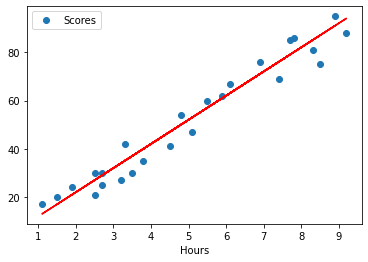

In [ ]:
df.plot(x='Hours',y='Scores', style='o')
plt.plot(df.Hours, y_pred, color='red')
plt.show()

In [ ]:
hours=9.25
own_pred=lre.predict([[hours]])
print(own_pred)

print('The expected score for studying for 9.25 hours is', round(own_pred[0]))

[94.62470303]
The expected score for studying for 9.25 hours is 95
